# Lecture notes - OOP polymorphism
This is the lecture note for OOP polymorphism - but it's built upon contents from previous lectures such as:

input-output
variables
if-statement
for loop
while
lists
random
strings
functions
error handling
file handling
dictionary
OOP
Note that this lecture note gives a brief introduction to polymorphism. I encourage you to read further about polymorphism.

# Polymorphism
same function name or operator used for different types
e.g. len() on a string, len() on a list
plus operator + on a string concatenates the string while on an int performs integer addition

In [1]:
print(f"len(['a','b','c']): {len(['a','b','c'])}")
print(f"len('abc'): {len('abc')}")

len(['a','b','c']): 3
len('abc'): 3


# Polymorphism in class methods

In [ ]:
class Fish:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return f"I am a fish, my name is {self.name}"

    def speak(self):
        print("Blupp blupp")


class Fox:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return f"I am a fox, my name is {self.name}, no one knows how I sound"

    def speak(self):
        return NotImplemented # as we don't know the sound of the fox 


animals = (Fish("Pelle"), Fox("Ylvis"))

# although animals have different types, you can iterate through it and call same method as they are bound to different objects
for animal in animals:
    # Using same method name, but behaves differently for different types
    print(animal) # Uses __str__() for both fish and fox
    animal.speak() #Uses speak for both fish and fox

I am a fish, my name is Pelle
Blupp blupp
I am a fox, my name is Ylvis, no one knows how I sound


<div style="max-width:66ch;">

## Operator overloading

<table style="display:inline-block; text-align:left;">
  <tr style="background-color: #174A7E; color: white;">
    <th>Operator</th>
    <th>Dunder Method</th>
  </tr>
  <tr>
    <td style="text-align: center;">+</td>
    <td style="text-align: center;">__add__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">-</td>
    <td style="text-align: center;">__sub__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">*</td>
    <td style="text-align: center;">__mul__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">/</td>
    <td style="text-align: center;">__div__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">//</td>
    <td style="text-align: center;">__floordiv__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">%</td>
    <td style="text-align: center;">__mod__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">**</td>
    <td style="text-align: center;">__pow__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;"><</td>
    <td style="text-align: center;">__lt__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;"><=</td>
    <td style="text-align: center;">__le__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">></td>
    <td style="text-align: center;">__gt__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">>=</td>
    <td style="text-align: center;">__ge__(self, other)</td>
  </tr>
  <tr>
    <td style="text-align: center;">==</td>
    <td style="text-align: center;">__eq__(self, other)</td>
  </tr>
</table>

</div>


Vector(2.0, 3.0, 51.5, 67.0, 1.0)
len(v1): 5
Both must be Vector and have the same length
v_23=Vector(3.0, 4.0)
abs(v_23)=5.0
__mul__ is called
Vector(4.0, 4.0)
__rmul__ is called ...
__mul__ is called


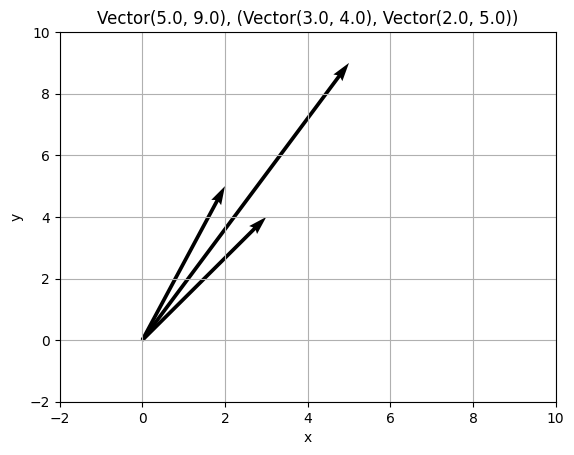

In [3]:
import matplotlib.pyplot as plt


class Vector:
    """A class to represent a Euclidean vector with magnitude and direction"""

    # in Python >= 3.10 - can use float | int in annotation
    def __init__(self, *numbers: float) -> None:  # *numbers is variadic parameter
        # error checking
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not valid number in a vector")

        if len(numbers) <= 0:
            raise ValueError("Vector can't be empty")

        # to take care of booleans
        self._numbers = tuple(float(number) for number in numbers)

    @property
    def numbers(self) -> tuple:
        return self._numbers

    def __add__(self, other: "Vector") -> "Vector":
        if self.validate_vectors(other):
            numbers = (a + b for a, b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def __sub__(self, other: "Vector") -> "Vector":
        if self.validate_vectors(other):
            numbers = (a - b for a, b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def __mul__(self, value: float) -> "Vector":
        print("__mul__ is called")
        if not isinstance(value, (int, float)):
            raise TypeError(
                f"The value for multiplication must be int or float not {type(value)}"
            )
        numbers = (value * a for a in self.numbers)
        return Vector(*numbers)

    # to make multiplication commutative, i.e. a*v = v*a
    def __rmul__(self, value: float) -> "Vector":
        print("__rmul__ is called ...")
        return self * value

    # for using len() method on a Vector object
    def __len__(self) -> int:
        """Returns number of components in a Vector not the length"""
        return len(self.numbers)

    def __abs__(self) -> float:
        """Returns the Euclidean norm of a Vector"""
        return sum(a**2 for a in self.numbers) ** 0.5

    def validate_vectors(self, other: "Vector") -> bool:
        """Validates if two vectors have same length"""
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError(f"Both must be Vector and have the same length")
        return len(self) == len(other)

    def __getitem__(self, item: int) -> float:
        return self.numbers[item]

    def plot(self, *others: "Vector") -> None:
        """Visualize 2D vectors"""
        X, Y = [], []

        for vector in tuple(others):
            if Vector.is2D(vector) and Vector.is2D(self):
                X.append(vector[0])
                Y.append(vector[1])

        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        _, ax = plt.subplots(1)
        ax.quiver(originX, originY, X, Y, scale=1, scale_units="xy", angles="xy")
        ax.set(
            xlabel="x",
            ylabel="y",
            title=f"{self}, {others}",
            xlim=(-2, 10),
            ylim=(-2, 10),
        )
        ax.grid()

        # TODO: make xlim and ylim adapt after the vectors dimensions
        # TODO: fix title paranthesis

    # not bound to the class and not bound to the instance
    # staticmethods can be used when you want a function that makes sense to be in the class
    # but doesn't need to be bound to either class or instance
    @staticmethod
    def is2D(vector: "Vector") -> bool:
        return len(vector) == 2

    def __repr__(self) -> str:
        return f"Vector{self.numbers}"

    # NOTE: There are many more features to be implemented, feel free to do it
    # TODO: implement norm between vectors
    # TODO: implement dot product
    # TODO: implement vector product
    # TODO: implement conjugate
    # TODO: implement projection


v1 = Vector(2, 3, 51.5, 67, True)
print(v1)
print(f"len(v1): {len(v1)}")

v2 = Vector(1, 2)
try:
    v1 + v2
except TypeError as err:
    print(err)

v3 = Vector(2, 2)

v_23 = v3 + v2
print(f"{v_23=}")
print(f"{abs(v_23)=}")

print(v3 * 2)
# 2*v3 not work if you haven't implemented __rmul__()
2 * v3

a = Vector(3, 4)
b = Vector(2, 5)
c = a + b

c.plot(a, b)